<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/statistics/ProductionfromNorwegianContinentalShelf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Oil and Gas Production from Norwegian Continental Shelf
#@markdown Since production started on the Norwegian continental shelf in 1971, oil and gas have been produced from a total of 112 fields. The overall production from these fields in 2019 was about 214.1 million standard cubic metres of oil equivalents (Sm3 o.e.).
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import urllib
import pandas as pd
%matplotlib inline

## Litterature
https://www.norskpetroleum.no/en/


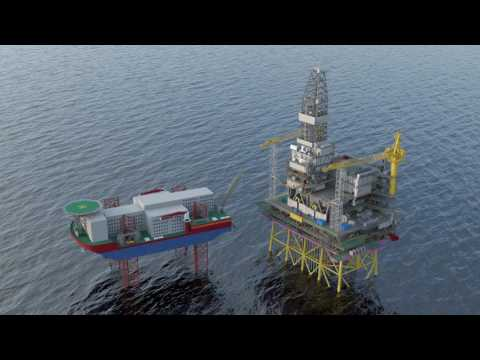

In [2]:
#@title  Oil and Gas Production from Norwegian Continental Shelf
#@markdown Johan Sverdrup is one of the five biggest oil fields on the Norwegian continental shelf. With expected resources of between 1.7 – 3.0 billion barrels of oil equivalent, it will also be one of the most important industrial projects in Norway over the next 50 years.
from IPython.display import YouTubeVideo
YouTubeVideo('vFeqtHGbIsI', width=600, height=400)

In [3]:
#@title  Production of oil and gas from Norwegian Continental Shelf
#@markdown Produksjondata https://factpages.npd.no/Default.aspx?culture=nb-no&nav1=field&nav2=TableView%7cProduction%7cSaleable%7cMonthly

url="https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_production_totalt_NCS_year__DisplayAllRows&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=143.97.2.35&CultureCode=en"

testfile = urllib.request.urlopen(url)
petdata=pd.read_csv(testfile)
petdata.head()

,prfYear,prfPrdOilNetMillSm3,prfPrdGasNetBillSm3,prfPrdNGLNetMillSm3,prfPrdCondensateNetMillSm3,prfPrdOeNetMillSm3,prfPrdProducedWaterInFieldMillSm3
0,2020,16.268,20.364,2.886,0.281,39.799,28.842
1,2019,81.739,115.250,17.375,1.655,216.020,168.136
2,2018,86.267,122.203,19.457,1.714,229.641,173.127
3,2017,92.278,124.664,20.395,1.707,239.045,171.880
4,2016,93.933,116.767,20.309,1.933,232.942,176.805


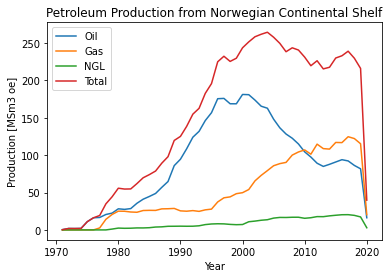

In [4]:
petdata2 = petdata.rename(columns={"prfPrdOilNetMillSm3": "Oil", "prfPrdGasNetBillSm3": "Gas", "prfPrdNGLNetMillSm3": "NGL", "prfPrdOeNetMillSm3": "Total"})
import matplotlib.pyplot as plt
plt.plot( 'prfYear', 'Oil', data=petdata2)
plt.plot( 'prfYear', 'Gas', data=petdata2)
plt.plot( 'prfYear', 'NGL', data=petdata2)
plt.plot( 'prfYear', 'Total', data=petdata2)
plt.ylabel('Production [MSm3 oe]')
plt.xlabel('Year')
plt.title("Petroleum Production from Norwegian Continental Shelf")
plt.legend()

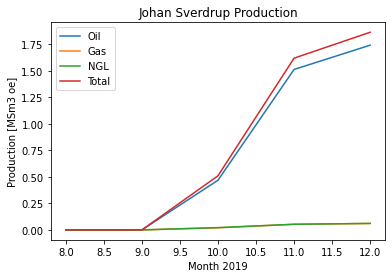

In [5]:
#@title  Production from Johan Sverdrup field
import urllib
url="https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_production_monthly&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=143.97.2.35&CultureCode=nb-no"

testfile = urllib.request.urlopen(url)
petdata=pd.read_csv(testfile)
petdata3 = petdata.loc[petdata['prfInformationCarrier']=='JOHAN SVERDRUP']
petdata4 =  petdata3.loc[petdata3['prfYear']==2019]
petdata4.head()
petdata4 = petdata4.rename(columns={"prfPrdOilNetMillSm3": "Oil", "prfPrdGasNetBillSm3": "Gas", "prfPrdNGLNetMillSm3": "NGL", "prfPrdOeNetMillSm3": "Total"})
import matplotlib.pyplot as plt
plt.plot( 'prfMonth', 'Oil', data=petdata4)
plt.plot( 'prfMonth', 'Gas', data=petdata4)
plt.plot( 'prfMonth', 'NGL', data=petdata4)
plt.plot( 'prfMonth', 'Total', data=petdata4)
plt.ylabel('Production [MSm3 oe]')
plt.xlabel('Month 2019')
plt.title("Johan Sverdrup Production")
plt.legend()


Total recoverable resources:  10448.300000000005  MSm3 oe


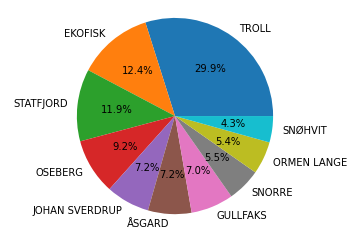

In [12]:
#@title Recoverable resources from Norwegian Continental Shelf
import urllib
url = "https://factpages.npd.no/ReportServer_npdpublic?/FactPages/TableView/field_reserves&rs:Command=Render&rc:Toolbar=false&rc:Parameters=f&rs:Format=CSV&Top100=false&IpAddress=not_used&CultureCode=nb-no"
testfile = urllib.request.urlopen(url)
petdata=pd.read_csv(testfile)
petdata4 = petdata.rename(columns={"fldName" : "Field Name", "fldRecoverableOE": "Recoverable oil equivalents"})
sumOE = petdata4.sum()["Recoverable oil equivalents"]
print("Total recoverable resources: ", sumOE, " MSm3 oe")
petdata4 = petdata4.nlargest(10, columns=['Recoverable oil equivalents'])

labels = petdata4["Field Name"]
sizes = petdata4["Recoverable oil equivalents"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()